In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [62]:
n_cust=100

f1=lambda x,y,noise=0.1: np.clip(1-0.2*(3*x**2+y**3)+noise*np.random.normal(0,noise),0,1)
f2=lambda x,y,noise=0.1: np.clip(1-0.5*(0.5*np.cos(x)+2*np.sin(y))+noise*np.random.normal(0,noise),0,1)
f=lambda x,y,p1,p2,noise=0.1: f1(x,y,noise)*(x-p1)+f2(x,y,noise)*(y-p2)

x=np.linspace(0,1,100)
y=np.linspace(0,1,100)
X,Y=np.meshgrid(x,y)

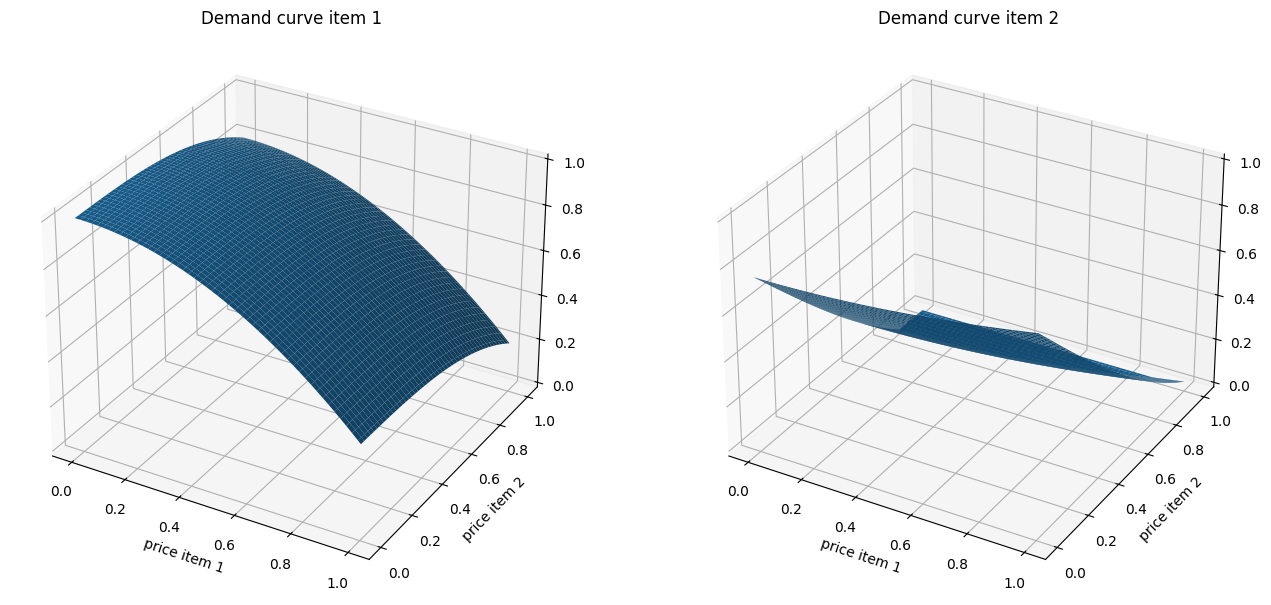

In [65]:
dem1=f1(X,Y,noise=0)
fig=plt.figure(figsize=(16,9))
ax=fig.add_subplot(121,projection='3d')
ax.plot_surface(X,Y,dem1)
ax.set_xlabel('price item 1')
ax.set_ylabel('price item 2')
ax.set_title('Demand curve item 1')
ax.set_zlim(zmin=0,zmax=1)

dem2=f2(X,Y,noise=0)
ax=fig.add_subplot(122,projection='3d')
ax.plot_surface(X,Y,dem2)
ax.set_xlabel('price item 1')
ax.set_ylabel('price item 2')
ax.set_title('Demand curve item 2')
ax.set_zlim(zmin=0,zmax=1)


plt.show()

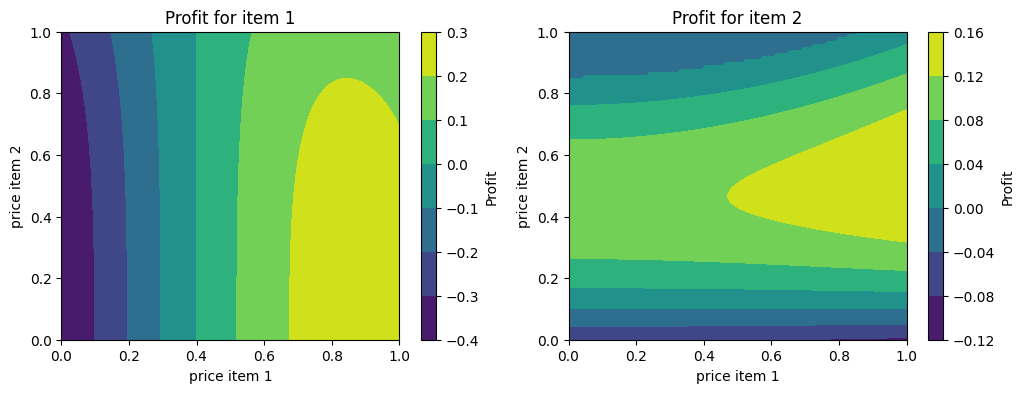

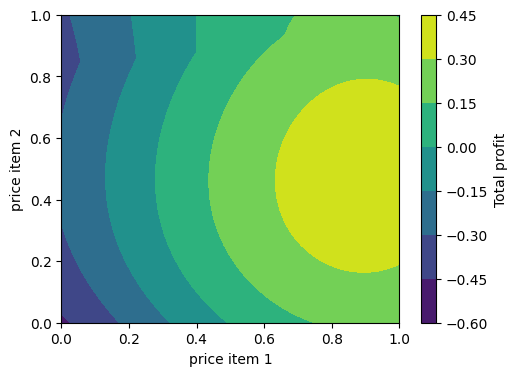

In [76]:
p1=0.4
p2=0.1

fig=plt.figure(figsize=(12,4))

profit_i1=f1(X,Y,noise=0)*(X-p1)
ax=fig.add_subplot(121)
ax.set_title('Profit for item 1')
cp=ax.contourf(X,Y,profit_i1)
plt.colorbar(cp,label='Profit')
plt.xlabel('price item 1')
plt.ylabel('price item 2')

profit_i2=f2(X,Y,noise=0)*(Y-p2)
ax=fig.add_subplot(122)
ax.set_title('Profit for item 2')
cp=ax.contourf(X,Y,profit_i2)
plt.colorbar(cp,label='Profit')
plt.xlabel('price item 1')
plt.ylabel('price item 2')

fig=plt.figure(figsize=(12,4))
tot_profit=f(X,Y,p1,p2,0)
ax=fig.add_subplot(121)
cp=ax.contourf(X,Y,tot_profit)
plt.colorbar(cp,label='Total profit')
plt.xlabel('price item 1')
plt.ylabel('price item 2')
plt.show()

In [79]:
args=np.unravel_index(np.argmax(tot_profit),tot_profit.shape)
best_p1=x[args[1]]
best_p2=x[args[0]]
print(f'Best price p1: {best_p1.round(2)},best price p2: {best_p2.round(2)}, best profit: {f(best_p1,best_p2,p1,p2,0).round(2)}')

Best price p1: 0.91,best price p2: 0.46, best profit: 0.39
